In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
faces = fetch_olivetti_faces()
print(faces.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Количество изображений в датасете

In [3]:
print(f"Количество изображений в датасете: {len(faces['data'])}")


Количество изображений в датасете: 400


Разделение на признаки и классы

In [4]:
x = pd.DataFrame(faces['data'])
y = faces['target']


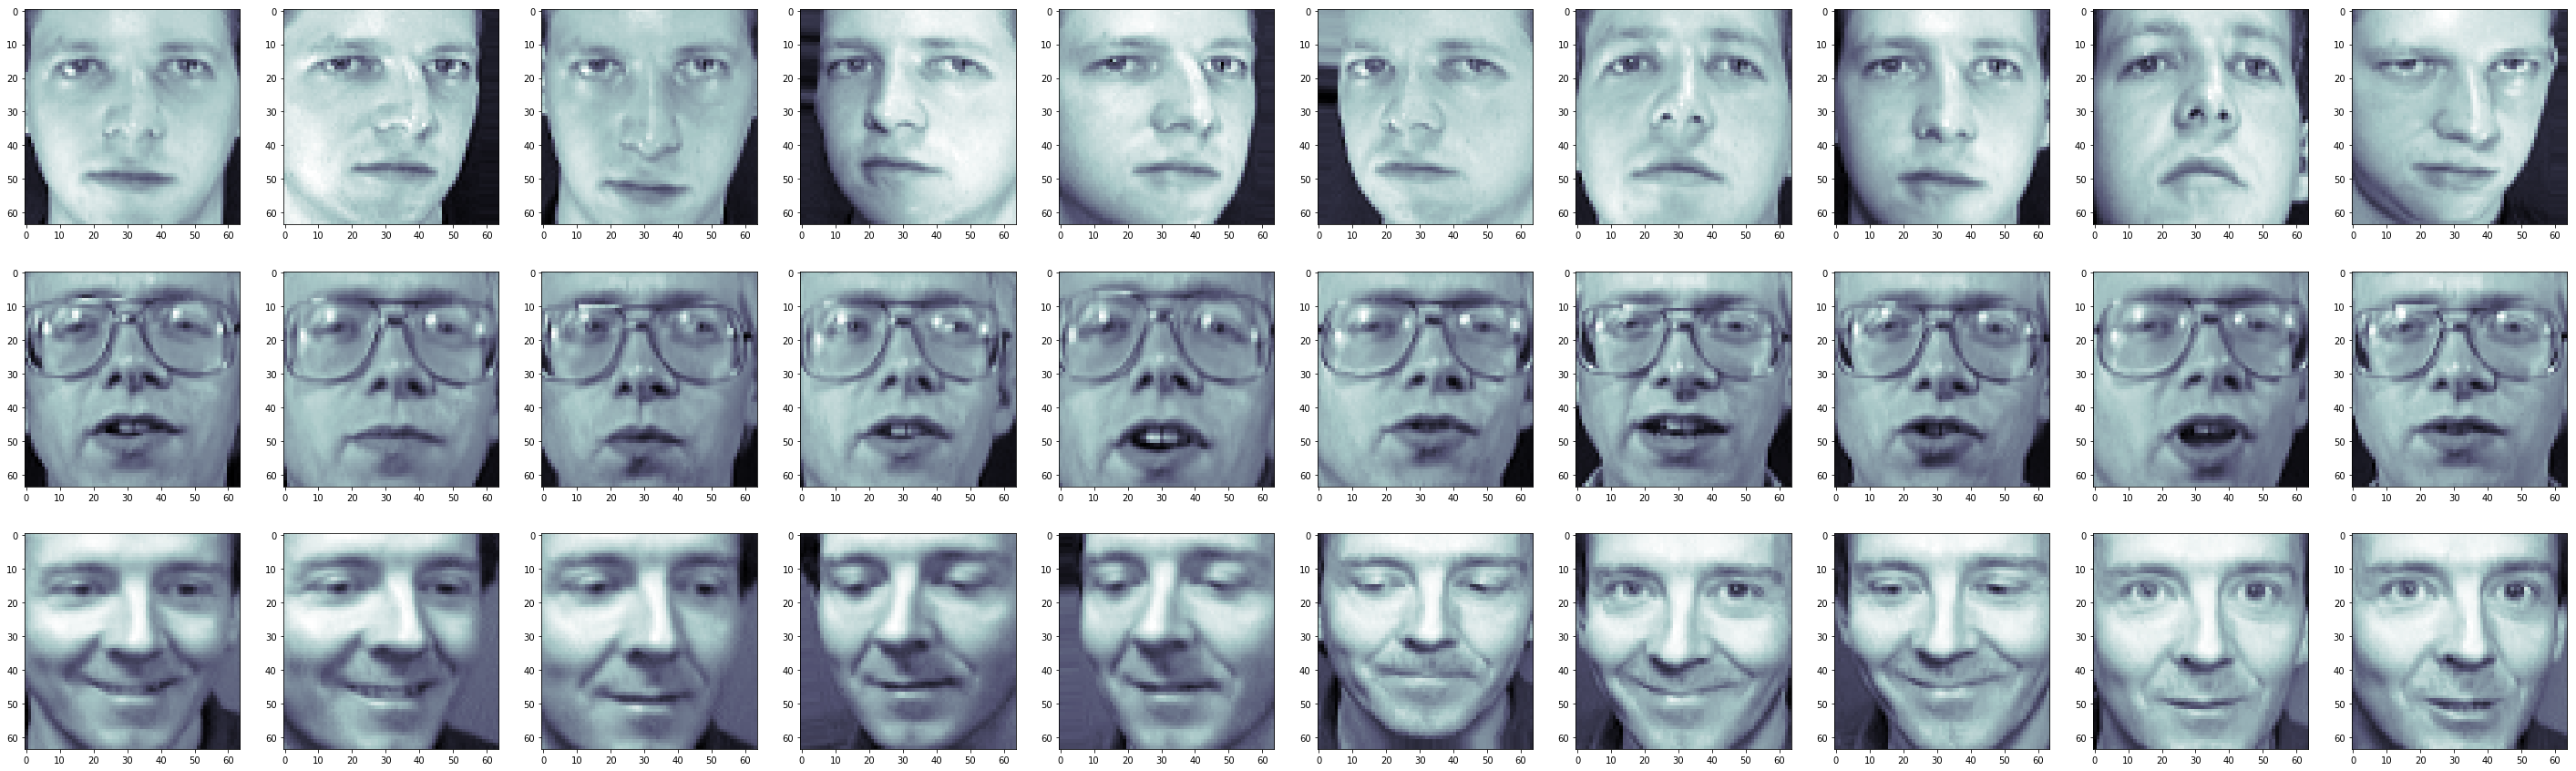

In [5]:
n = x.shape[0]
n = 30
cols = 10
rows = n//cols+1 if (n/cols > n//cols) else n//cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
row_i = 0
for i in range(n):
    axes[i//cols, i % cols].imshow(faces['images'][i], cmap=plt.cm.bone)


Разделение на тестовую и обучающую выборки

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=True)


## Функции 

In [7]:
# Матрица неточностей
def draw_heat(y_test, y_pred):
    class_names = y_test
    fig, ax = plt.subplots(figsize=(10, 8)) 
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')


In [8]:
# График с ошибкой
def plot_with_err(x, data, **kwargs):
    data_mean, data_std = data.mean(axis=1), data.std(axis=1)
    lines = plt.plot(x, data_mean, '-', **kwargs)
    plt.fill_between(x, data_mean - data_std, data_mean + data_std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)


In [9]:
# Обучающие кривые
def print_learning_curve(model, x_train, y_train):
    train_sizes = np.linspace(0.1, 1, 20)
    _, train_scores, val_scores = learning_curve(
        model, x_train, y_train, train_sizes=train_sizes, cv=4)
    plt.figure('Learning Curve')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plot_with_err(train_sizes, train_scores,
                  label='Training scores', color='red')
    plot_with_err(train_sizes, val_scores,
                  label='Validation scores', color='orange')
    plt.legend()
    plt.show()


## Метод опорных векторов 

In [10]:
cls = svm.SVC()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


Оценка качества модели

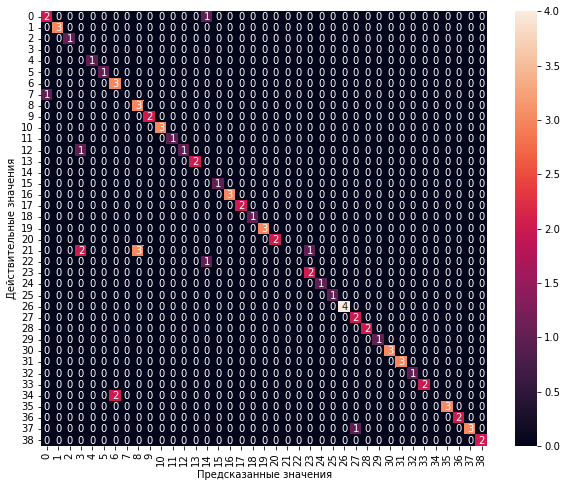

In [11]:
draw_heat(y_test, y_pred)


In [12]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.8375
Метрика точности:
0.7974358974358974
Метрика полноты
0.8183760683760684


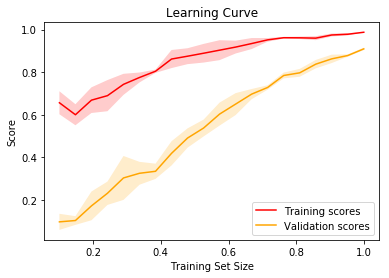

In [13]:
print_learning_curve(cls, x_train, y_train)


## Логистическая регрессия 

In [14]:
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Оценка качества модели

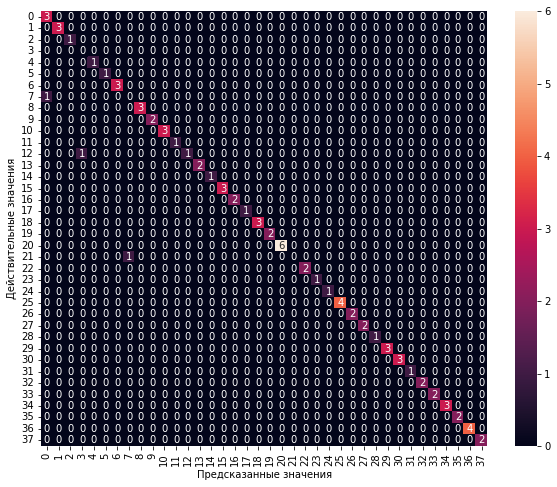

In [15]:
draw_heat(y_test, y_pred)


In [16]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.9625
Метрика точности:
0.9144736842105263
Метрика полноты
0.9078947368421053


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

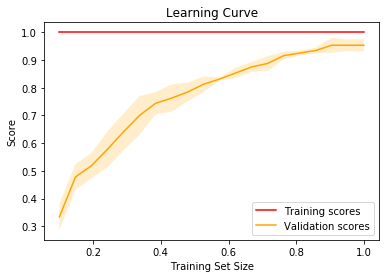

In [17]:
print_learning_curve(cls, x_train, y_train)


## Метод опорных векторов с гауссовым ядром 

In [18]:
cls = svm.SVC(kernel='rbf')
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


Оценка качества модели

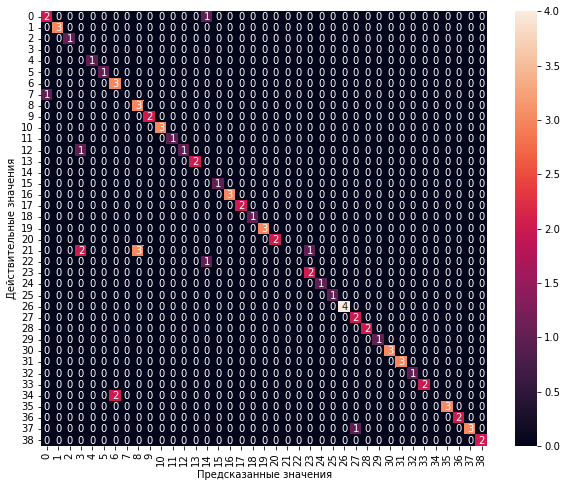

In [19]:
draw_heat(y_test, y_pred)


In [20]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.8375
Метрика точности:
0.7974358974358974
Метрика полноты
0.8183760683760684


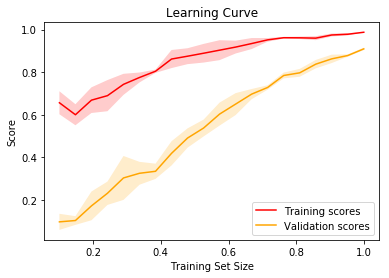

In [21]:
print_learning_curve(cls, x_train, y_train)


## Метод опорных векторов с полиномиальным ядром 

In [22]:
cls = svm.SVC(kernel='poly')
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


Оценка качества модели

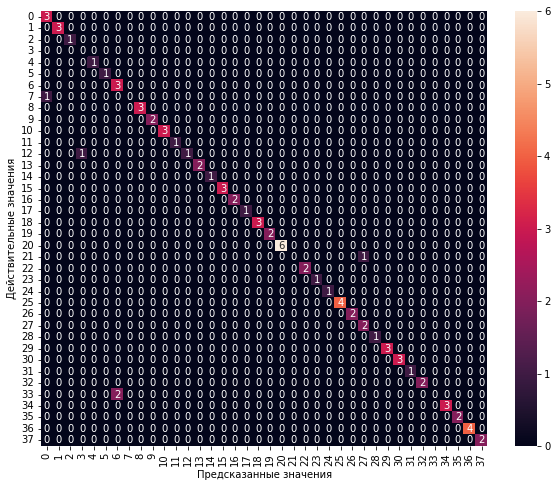

In [23]:
draw_heat(y_test, y_pred)


In [24]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.9375
Метрика точности:
0.868859649122807
Метрика полноты
0.881578947368421


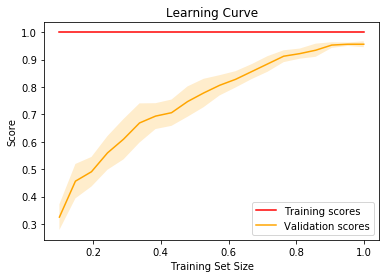

In [25]:
print_learning_curve(cls, x_train, y_train)


## Метод k ближайших соседей 

In [26]:
cls = KNeighborsClassifier()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


Оценка качества модели

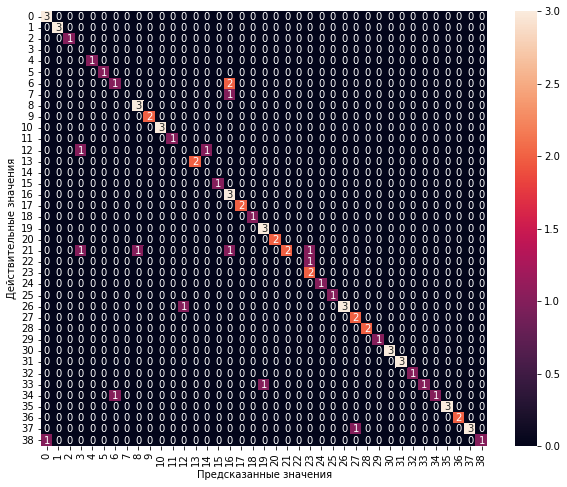

In [27]:
draw_heat(y_test, y_pred)


In [28]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.8125
Метрика точности:
0.8037240537240538
Метрика полноты
0.7863247863247863


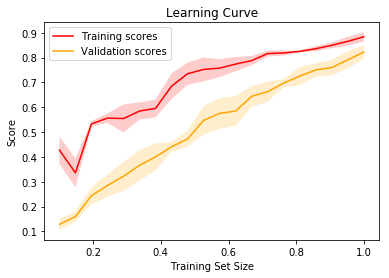

In [29]:
print_learning_curve(cls, x_train, y_train)


## Многослойный перцептрон 

In [30]:
cls = MLPClassifier(random_state=42)
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Оценка качества модели

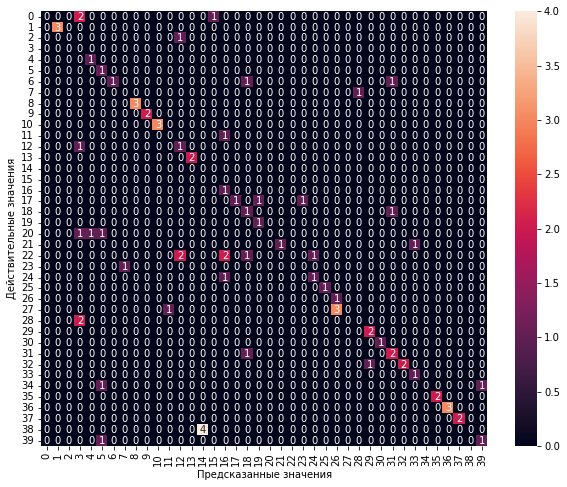

In [31]:
draw_heat(y_test, y_pred)


In [32]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))


Метрика достоверности предсказания:
0.5125
Метрика точности:
0.4716666666666667
Метрика полноты
0.5375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\n

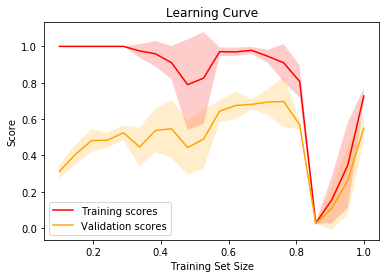

In [33]:
print_learning_curve(cls, x_train, y_train)
